Nama : Arsyadana Estu Aziz

NIM : 121140068

## Image Processing 101

Pada kesempatan kali ini, saya akan menjelaskan tentang cara penggunan gaussian blur xd :)


Image saved at d:\Stuff That I Need to Do\IF4021 - Multimedia Technology\material\week8\results\vase_blured.jpeg


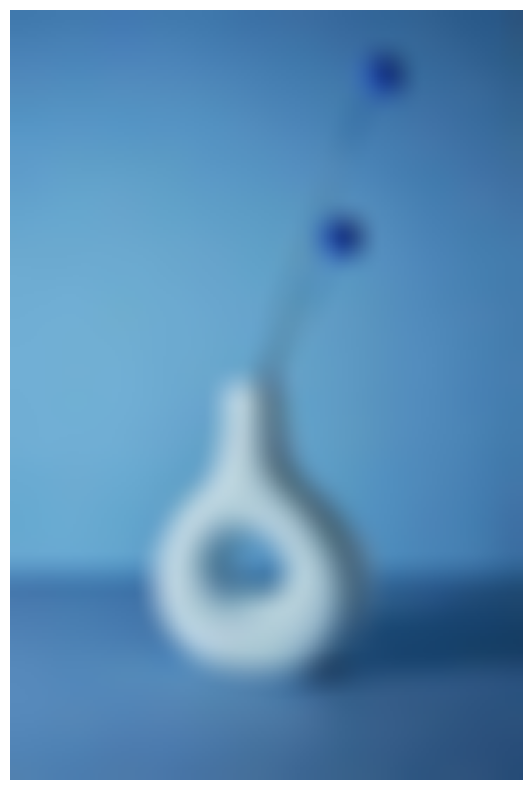

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Set input dan output dari gambar blur
input_image_path = os.path.join(os.getcwd(), 'attachment', 'vase.jpeg')  
output_image_path = os.path.join(os.getcwd(), 'results', 'vase_blured.jpeg')  

## Baca imagenya
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"The image at path '{input_image_path}' could not be found.")

## Membuat filter gaussian dengan matrix dimensi 15 x 15 dengan standar deviasi 5
blurred_image = cv2.GaussianBlur(image, (15,15), 5)

## Simpan dalam file
cv2.imwrite(output_image_path, blurred_image)
print(f"Image saved at {output_image_path}")
plt.figure(figsize=(10, 10))
plt.imshow(blurred_image)
plt.axis('off')
plt.show()

## Sekian dari saya dan terimakasih.

Tidak secepat itu, tidak terlalu seru kalau langsung make fungsi jadi (`cv2.GaussianBlur`).

## Konvolusi
Sebuah kalimat yang tidak asing, terutama ketika sudah berurusan dengan Machine Learning, Image Processing dll, namun apakah itu?

Secara sederhana, Konvolusi ada proses untuk melakukan perkalian antar dua fungsi untuk menciptakan sebuah fungsi baru. Dalam konteks sinyal mungkin ketikan mengalikan 2 buah sinyal dan dalam konteks audio ketika mengalikan 2 buah matrix

Ingat satuan unit dalam pengolahan citra itu RGB (Kombinasi dari nilai merah, hijau dan biru)

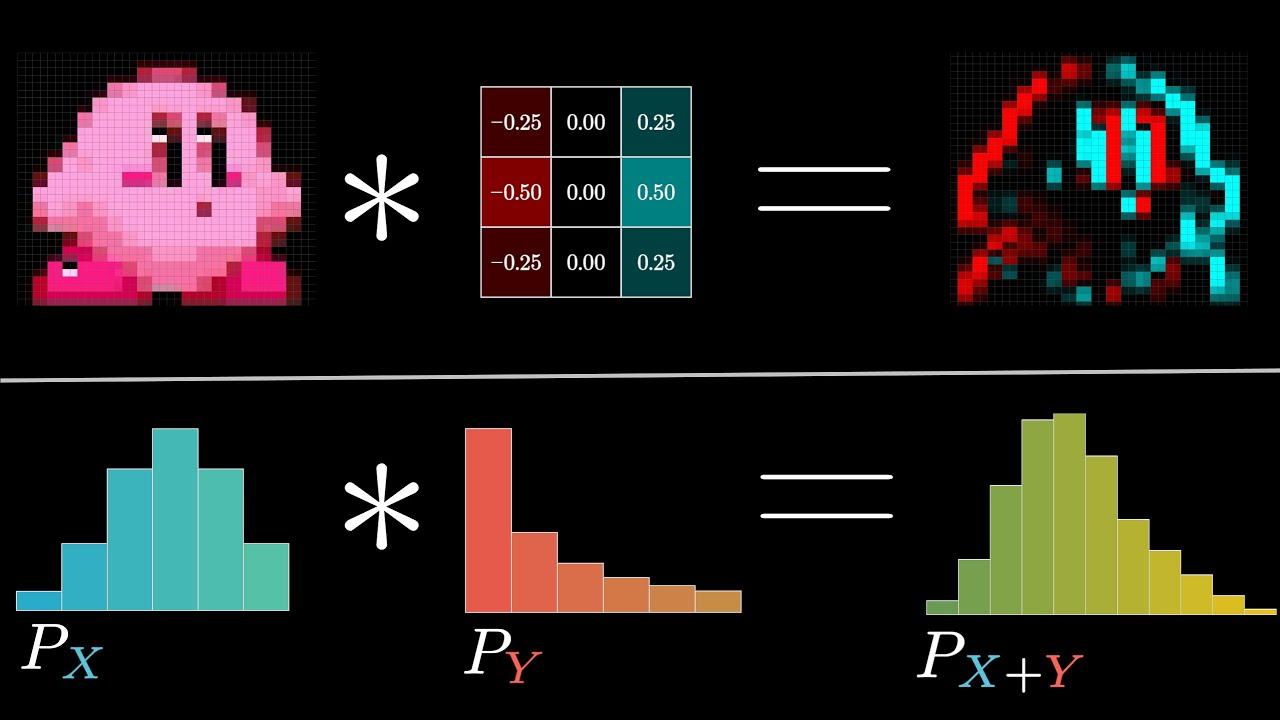

## How does it work
Pada image processing, konvolusi terjadi ketika kita melakukan perkalian pada matrix gambar dengan sebuah matrix filter / kernel untuk menghasilkan bagian. Let's take a case here
Misal saya mempunyai matrix gambar sebagai berikut:

```
Image Matrix:
|  10  |  20  |  30  |
|  40  |  50  |  60  |
|  70  |  80  |  90  |
```
Saya akan mengambil sebagian dari array itu (misalnya 3 x 3 sub matrix) lalu dikalikan dengan filter operasi (misalnya filter blur, grayscale dll). Misalkan kita punnya kernel berikut:

```
Blurring Kernel:
|  1/9  |  1/9  |  1/9  |
|  1/9  |  1/9  |  1/9  |
|  1/9  |  1/9  |  1/9  |
```
```
Image Patch:         Blurring Kernel:
|  10  |  20  |  30  |     |  1/9  |  1/9  |  1/9  |
|  40  |  50  |  60  |  *  |  1/9  |  1/9  |  1/9  |
|  70  |  80  |  90  |     |  1/9  |  1/9  |  1/9  |
```
Element pertama merupakan jumlah dari perkalian matriks, lakukan untuk setiap elemen
```
Elemen pertama
(10 * 1/9) + (20 * 1/9) + (30 * 1/9) +
(40 * 1/9) + (50 * 1/9) + (60 * 1/9) +
(70 * 1/9) + (80 * 1/9) + (90 * 1/9)
```
Ingat, kita mengalikan bagian merah, hijau dan biru dari sumber dengan kernel.

## Kernel / Filter
Kernel itu apa? Secara sederhana dalam image processing, kurang lebih kernel itu adalah seperti semacan konstanta yang dibuat khusus oleh seseorang untuk tugas spesifik seperti bluring, grayscaling dll.

1. Gaussian Blur (3x3)
```python
gaussian_blur_kernel = 1/16 * np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]]) 
```

2. Gaussian Blur filter (5x5)
```python
gaussian_filter_5x5 = (1/256) * np.array([[1,  4,  6,  4,  1],
                                          [4, 16, 24, 16,  4],
                                          [6, 24, 36, 24,  6],
                                          [4, 16, 24, 16,  4],
                                          [1,  4,  6,  4,  1]])
```

3. Sharpening Kernel 
```python
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])
```

4. Prewwit Edge Detection
```python
prewitt_horizontal_kernel = np.array([[-1, 0, 1],
                                      [-1, 0, 1],
                                      [-1, 0, 1]])
```

## Let's code Along
Kita coba buat sebuah kodingan sederhana menggunakan konvolusi

Image saved at d:\Stuff That I Need to Do\IF4021 - Multimedia Technology\material\week8\results\vase_blured.jpeg


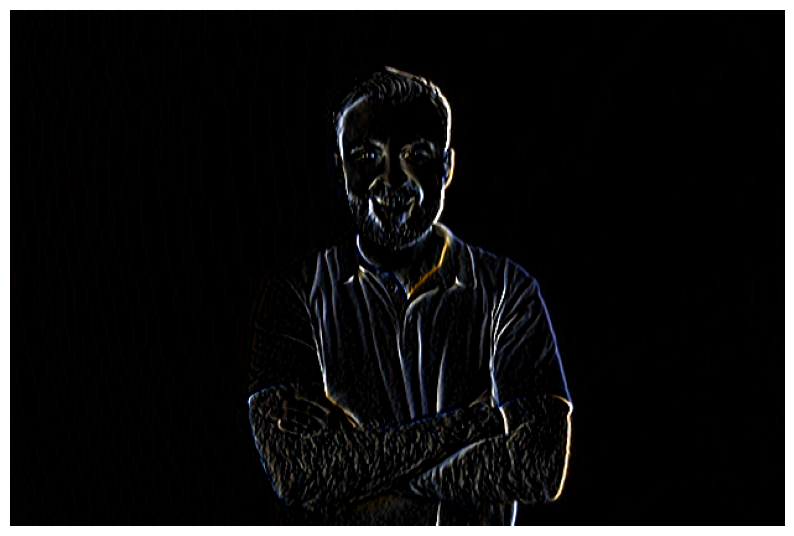

In [15]:
# import cv2
# import numpy as np
# import os

# # Load an image in grayscale
# input_image_path = os.path.join(os.getcwd(), 'attachment', 'vase.jpeg')  # Replace with your image path
# output_image_path = os.path.join(os.getcwd(), 'results', 'vase_blurred.jpeg')  # Replace with your desired output path

# image = cv2.imread(input_image_path)

# # Define a 3x3 Gaussian filter
# gaussian_blur_kernel = 1/16 * np.array([[1, 2, 1],
#                                  [2, 4, 2],
#                                  [1, 2, 1]]) 

# # Apply the Gaussian filter using convolution
# output = cv2.filter2D(image, -1, gaussian_blur_kernel)

# cv2.imwrite(output_image_path, output)
# print(f"Image saved at {output_image_path}")

import cv2
import os
import numpy as np

input_load_path = os.path.join(os.getcwd(), "attachment", "person.jpg")
ouput_load_path = os.path.join(os.getcwd(), "results", "person_sharp.jpeg")

image = cv2.imread(input_load_path)

prewitt_horizontal_kernel = np.array([[-1, 0, 1],
                                      [-1, 0, 1],
                                      [-1, 0, 1]])

output_image = cv2.filter2D(image, -1, prewitt_horizontal_kernel)

cv2.imwrite(ouput_load_path, output_image)

print(f"Image saved at {output_image_path}")
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()


### Semakin tinggi dimensi matrix kernel, maka semakin besar pula efek hasilnya
Pada konteks ini, kita menggunakan gaussian blur sebagai kernel, Fungsi `cv2.GaussianBlur` memakai kernel dengan dimensi 15x15.

### Kenapa pake cv2.filter2D
filter2D adalah fungsi general untuk melakukan proses konvolusi (perkalian antar matrix)

## Bonus : Meme Maker
Bentuk multimedia paling sederhana, buat meme

Image saved at d:\Stuff That I Need to Do\IF4021 - Multimedia Technology\material\week8\results\vase_blured.jpeg


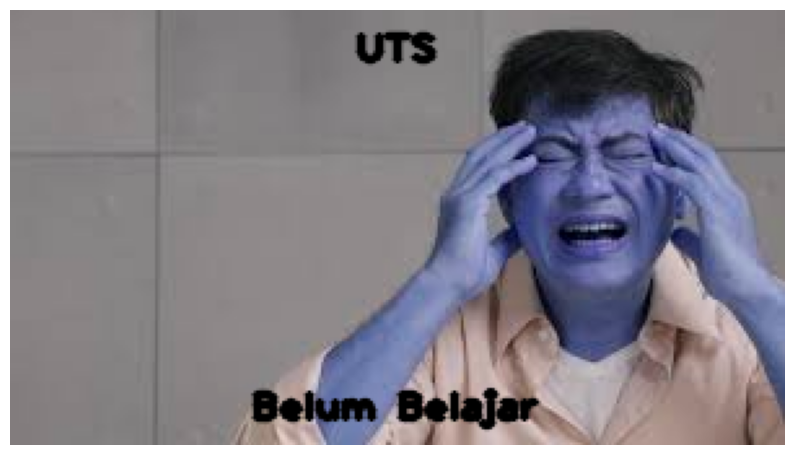

In [16]:
import cv2
import os

# Load the image
image_path = os.path.join(os.getcwd(), 'attachment', 'stress_person.jpeg')  
image = cv2.imread(image_path)

# Set the text you want to add
top_text = "UTS"
bottom_text = "Belum Belajar"

# Define font, scale, color, and thickness
font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1
color = (0, 0, 0) 
thickness = 2

# Get the size of the text
(top_text_width, top_text_height), baseline = cv2.getTextSize(top_text, font, font_scale, thickness)
(bottom_text_width, bottom_text_height), baseline = cv2.getTextSize(bottom_text, font, font_scale, thickness)

# Set the text position
top_text_x = (image.shape[1] - top_text_width) // 2
top_text_y = top_text_height + 10  
bottom_text_x = (image.shape[1] - bottom_text_width) // 2
bottom_text_y = image.shape[0] - 10  

# Put the text on the image
cv2.putText(image, top_text, (top_text_x, top_text_y), font, font_scale, color, thickness, cv2.LINE_AA)
cv2.putText(image, bottom_text, (bottom_text_x, bottom_text_y), font, font_scale, color, thickness, cv2.LINE_AA)

# Save the output image
output_path = 'results/meme_image.png'  
cv2.imwrite(output_path, image)
print(f"Image saved at {output_image_path}")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

